In [ ]:
#과제 명세에 따르고, 힌트 함수를 쓸 수 있도록 import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. 데이터 로드 및 구조 확인 
iris = sns.load_dataset('iris')
print("=== 데이터 구조 확인 (Head) ===")
print(iris.head())
print("\n=== 데이터 정보 확인 (Info) ===")
print(iris.info())

=== 데이터 구조 확인 (Head) ===
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

=== 데이터 정보 확인 (Info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# 2. 기술통계량 확인 
desc_stats = iris.groupby('species')['petal_length'].describe()
print("\n=== Species별 Petal Length 기술통계량 ===")
print(desc_stats)


=== Species별 Petal Length 기술통계량 ===
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


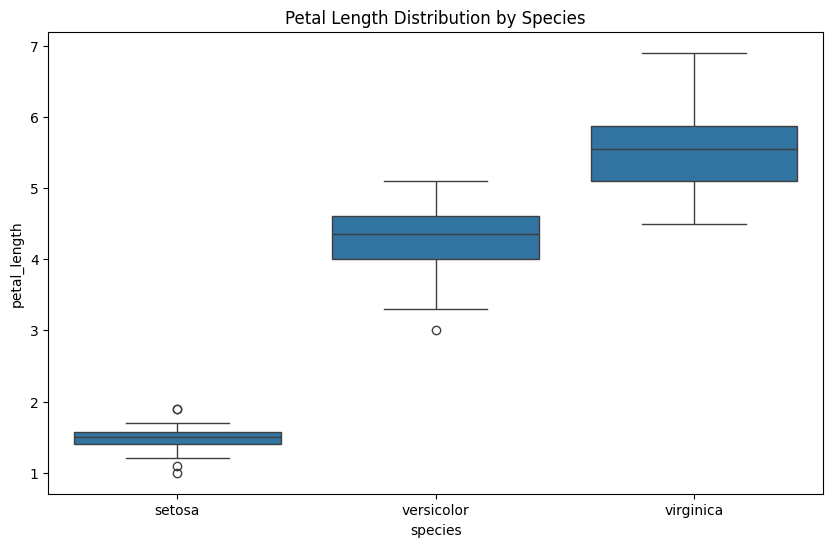

In [ ]:
# 3. 시각화 (Boxplot) 
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length Distribution by Species')
plt.show()

In [ ]:
# 4. 정규성 검정 (Shapiro-Wilk)
# 가설: H0(귀무가설) = 데이터가 정규분포를 따른다. / H1(대립가설) = .. 따르지 않는다.
print("\n=== 정규성 검정 (Shapiro-Wilk) ===")
species_list = iris['species'].unique()
for sp in species_list:
    data = iris[iris['species'] == sp]['petal_length']
    stat, p_val = stats.shapiro(data)
    print(f"Species: {sp}, P-value: {p_val:.4f}")
    # 해석: P-value가 0.05보다 작으면 정규성 기각


=== 정규성 검정 (Shapiro-Wilk) ===
Species: setosa, P-value: 0.0548
Species: versicolor, P-value: 0.1585
Species: virginica, P-value: 0.1098


In [ ]:
# 5. 등분산성 검정 (Levene)
# 가설: H0 = 그룹 간 분산이 같다. / H1 = 그룹 간 분산이 다른 게 존재한다.
print("\n=== 등분산성 검정 (Levene) ===")
group1 = iris[iris['species'] == 'setosa']['petal_length']
group2 = iris[iris['species'] == 'versicolor']['petal_length']
group3 = iris[iris['species'] == 'virginica']['petal_length']

stat, p_val = stats.levene(group1, group2, group3)
print(f"Levene Result - P-value: {p_val:.4f}")
# 해석: P-value가 0.05보다 작으면 등분산성 기각 (이분산임)


=== 등분산성 검정 (Levene) ===
Levene Result - P-value: 0.0000


In [ ]:
# 6. ANOVA 가설 수립 
print("\n=== ANOVA 가설 ===")
print("H0: 세 종(Species) 간의 Petal Length 평균에는 차이가 없다.")
print("H1: 적어도 한 그룹의 평균은 다른 그룹과 차이가 있다.")


=== ANOVA 가설 ===
H0: 세 종(Species) 간의 Petal Length 평균에는 차이가 없다.
H1: 적어도 한 그룹의 평균은 다른 그룹과 차이가 있다.


In [ ]:
# 7. One-way ANOVA 
print("\n=== One-way ANOVA 결과 ===")
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4e}")
# 해석: P-value < 0.05 이면 귀무가설 기각 (평균 차이 있음)


=== One-way ANOVA 결과 ===
F-statistic: 1180.1612, P-value: 2.8568e-91


In [ ]:
# 8. 사후검정 (Tukey HSD) 
print("\n=== 사후검정 (Tukey HSD) ===")
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey)


=== 사후검정 (Tukey HSD) ===
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


In [ ]:
# 9. 회귀 분석 
# 입력(X): 
# 타겟(y)
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

# Train/Test 분리 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가 
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== 회귀 분석 결과 ===")
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"회귀 계수(Coefficients): {model.coef_}")
print(f"절편(Intercept): {model.intercept_}")



=== 회귀 분석 결과 ===
MSE: 0.1300
R2 Score: 0.9603
회귀 계수(Coefficients): [ 0.72281463 -0.63581649  1.46752403]
절편(Intercept): -0.2621959025887066
